# Project: California housing prices prediction

Group members: Wenxi Xu, Yujie Feng, Zhuoyue Zhang

# Introduction

### Project topic: California housing prices prediction

For the scientific purposes of this research project, the major question the work attempts to answer is to employ validated regression approaches including OLS and random forest regressions to critically comprehend the underlying relationships among financial values of housing properties within state of California and other measurable variables such as a property’s physical distance to locations including Los Angeles, the sea coastlines, and San Francisco, median revenue and income of surveyed residents, and biological ages of these people. 

It aims to construct predictive models via these methods before feeding them with recent datasets acquired through Kaggle platform such as distance, population feature, and physical feature information to accurately and precisely project how different values for these traits actually determine the quantitative patterns of housing prices.

### Why we care about California housing prices

The computed projections from these models can reveal whether geographical location actually holds a negative relationship with house value, where closer proximity to a property’s location imply larger financial worth for such property. Moreover, are residents’ financial incomes and physical ages indeed positively or negatively correlated with actual values of houses; is it true that more wealthy residents tend to concentrate in hubs of more expensive properties while the reverse holds true for ones who are living under poverty. Do age actually decides whether a person belongs to regions holding more expensive real estate properties. 

### Previous papers about house price prediction

There have been previous papers published by many authors from the Kaggle or other data science platforms which attempted to address similar questions using different regression methods and points of interests such as other North American cities or even regions from other parts of the globe; some of these works have already validated the accuracy of the mentioned social trends.

This report is comprised of the following sections: data, modeling, findings, and conclusions which will respectively explore datasets being acquired for research works pertaining to this project, actual implementations of the chosen modeling and predicting approaches involving the two mentioned regression methods, the main findings determined and analytic outcomes, and lastly takeaways being acquired from the experiments being conducted.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

## 1. Load Data



In [10]:
base_dir = r"E:"

In [11]:
df_sample = pd.read_csv('~/Desktop/California_Houses.csv') 
df_sample.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [12]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo


## 2. Exploratory Data Analysis


    Data is gained from the Kaggle website. The dataset contains fourteen columns of numerical values, including five distant-related information, four population features values, three house-related features, and two geographical features. In the dataset, we do not have any other background information, so we propose forecasting the housing price in this area. To accurately predict the housing prices, firstly, we have to analyze the relationship between median house value and related variables. Then, we will build an effective model to evaluate the house value so that sellers and buyers can trade within a reasonable price level.

    After a quick glance at the dataset, it is crucial to visualize the numerical data because it helps researchers identify the distribution of the dataset and figure out whether there is any relationship between variables. 


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import PercentFormatter

plt.rc('font',family='Times New Roman')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

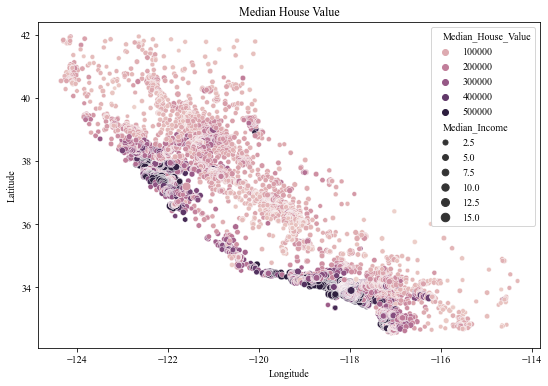

In [15]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=df_sample["Longitude"], y=df_sample["Latitude"], hue=df_sample["Median_House_Value"], size=df_sample["Median_Income"])
plt.title("Median House Value")
plt.show()

    We can see a clear correlation between median house value and house geographical position from the graph. For the same longitude, lower latituder tends to have higher median house values. Also, the graph shows that households with higher income tend to live in houses with higher median house values.

In [7]:
df_sample.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

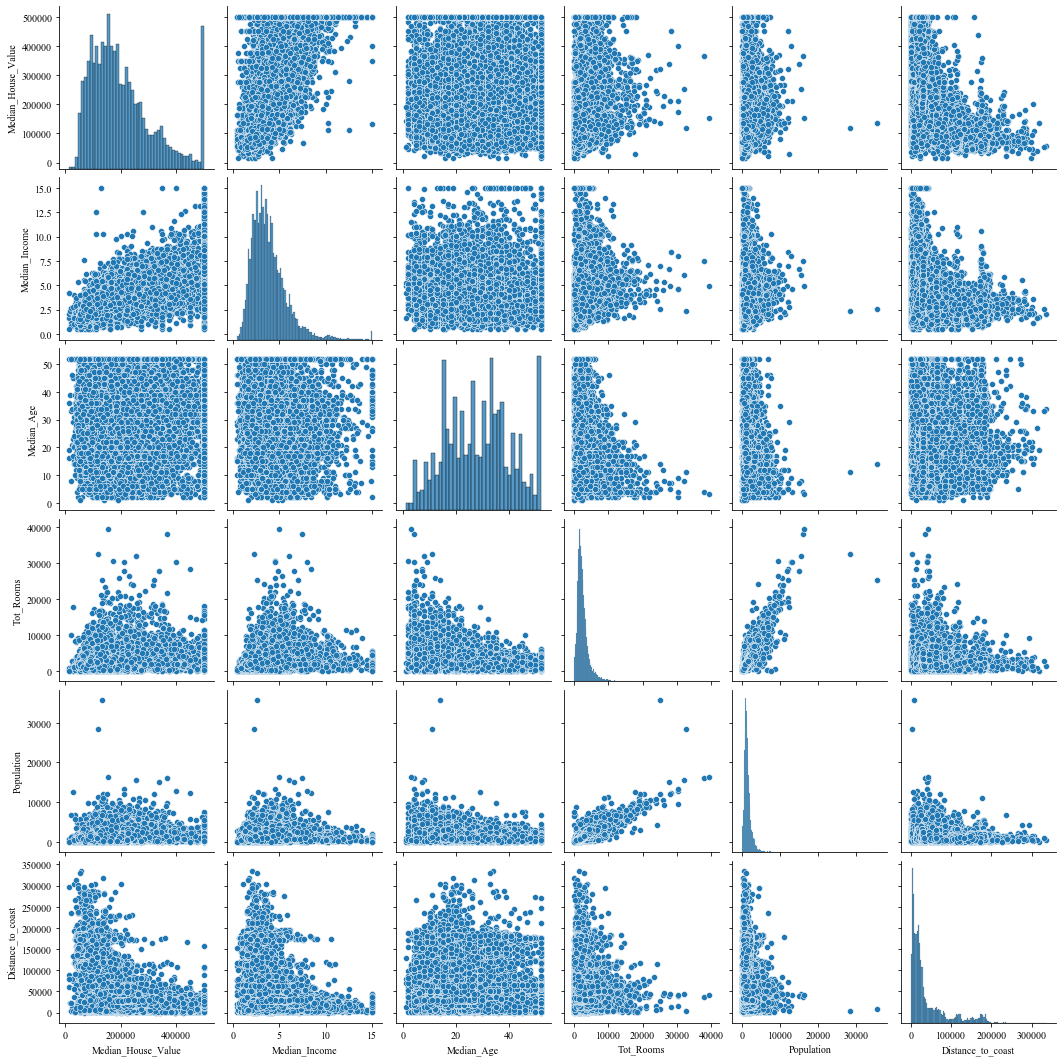

In [8]:
attrs = ["Median_House_Value", "Median_Income", "Median_Age", "Tot_Rooms", "Population", "Distance_to_coast"]
sns.pairplot(data=df_sample[attrs])

The above graph matrix shows that:

    1. Tot_rooms has abnormal distribution, which is right-skewed distribution. Tot-rooms are highly correlated with median house value.
    
    2. Median_income also displaces a highly positive correlation with house price. To further identify the relationship between median_income and median_house_values, we enlarge the image of median_income and median_house_value image. The image depicts a positive correlation between two variables. Meanwhile, we found a horizontal line when median_house_value is equal to 500,000. Therefore, our goal is to delete blocks that median_house_value equals 500,000 to prevent overfitting.
    
    3. Distance_to_coast shows a negative correlation with median_house_income.


In [9]:
df_sample["Median_House_Value"].max(), df_sample["Median_House_Value"].min()

(500001.0, 14999.0)

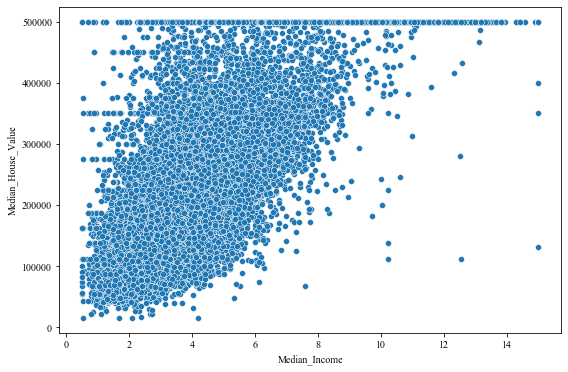

In [10]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df_sample, x="Median_Income", y="Median_House_Value")
plt.show()

In [11]:
df_sample["Median_House_Value"].value_counts().sort_values(ascending=False)

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
43600.0       1
447100.0      1
487200.0      1
470500.0      1
405500.0      1
Name: Median_House_Value, Length: 3842, dtype: int64

## 3. Feature Engineering

    In this part, we use given characteristics to combine and get more meaningful variables, for example:
    
    1. Calculate rooms_per_household through Tot_rooms and Households.

    2. Calculate bedrooms_per_house, dividing Tor_bedrooms by Tot_rooms.

    3. Calculate population per household using population and households.

    4. Calculate population per room using tot_rooms divided population.

    5. Calculate population per bedroom using tot_rooms and population.

In [28]:
df_sample.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco',
       'rooms_per_household', 'bedrooms_per_house', 'popu_per_household',
       'rooms_per_popu', 'bedrooms_per_popu'],
      dtype='object')

In [29]:
df_sample["rooms_per_household"] = df_sample["Tot_Rooms"]   /df_sample["Households"]
df_sample["bedrooms_per_house"]  = df_sample["Tot_Bedrooms"]/df_sample["Tot_Rooms"]
df_sample["popu_per_household"]  = df_sample["Population"]  /df_sample["Households"]
df_sample["rooms_per_popu"]      = df_sample["Tot_Rooms"]   /df_sample["Population"]
df_sample["bedrooms_per_popu"]   = df_sample["Tot_Bedrooms"]/df_sample["Population"]

## 4. Outliers


### 4.1 Outliers Detection

In this part, we check the outliers of each variable to eliminate outliers' negative impact on the final prediction.

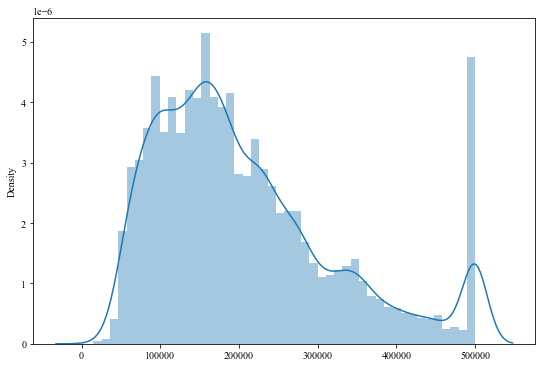

In [17]:
plt.figure(figsize=(9, 6))
ax = sns.distplot(x=df_sample["Median_House_Value"])

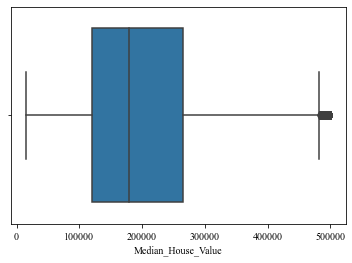

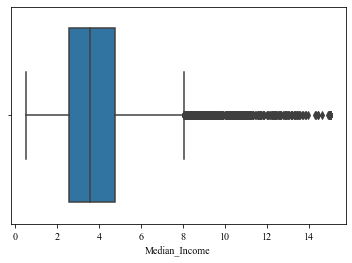

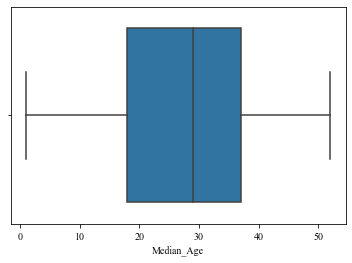

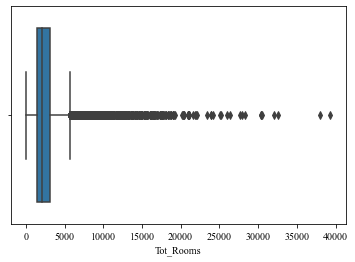

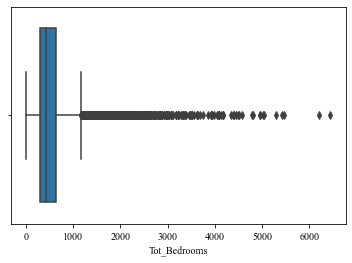

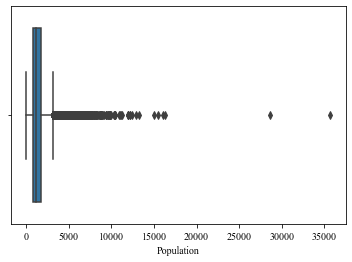

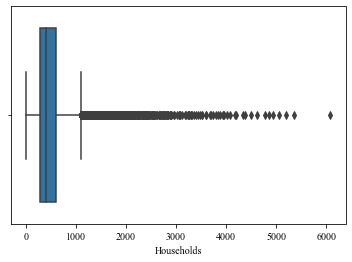

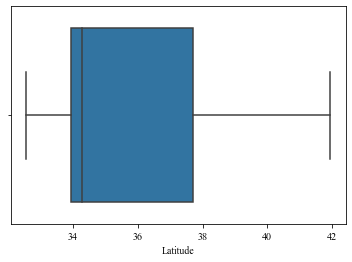

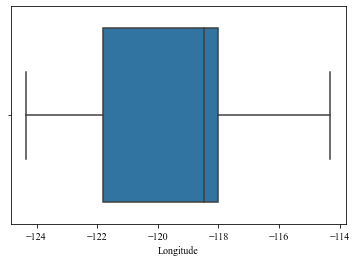

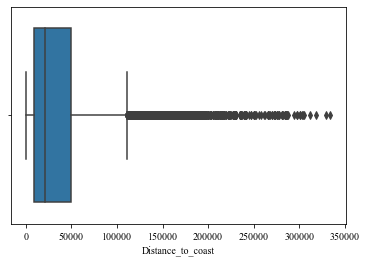

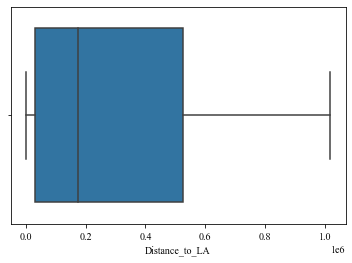

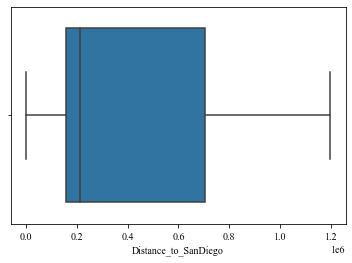

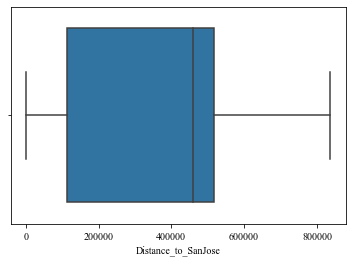

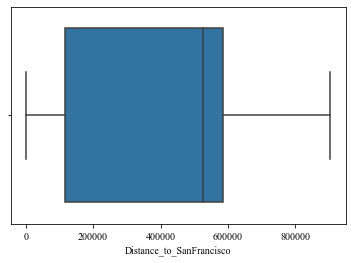

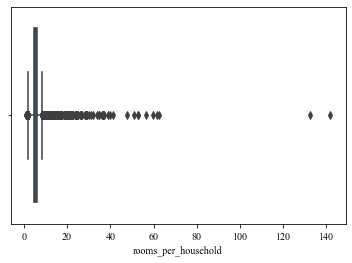

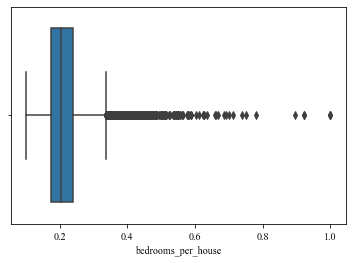

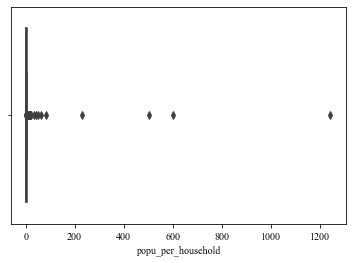

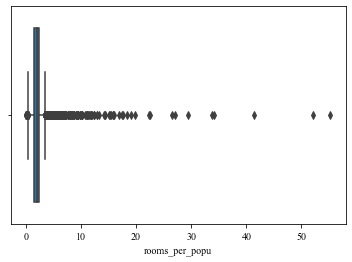

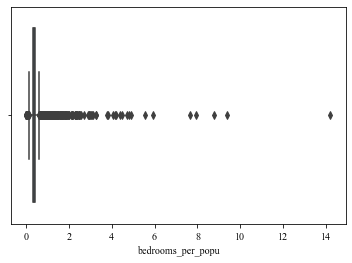

In [18]:
for col in df_sample.columns:
    sns.boxplot(df_sample[col])
    plt.show()

In [19]:
df_sample.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco',
       'rooms_per_household', 'bedrooms_per_house', 'popu_per_household',
       'rooms_per_popu', 'bedrooms_per_popu'],
      dtype='object')

### 4.2 Outlier Problems:


1. From the graph above, the graph shows that median_house_value ≥ 500000 does not conform distribution rules, so we delete all median_house_value ≥ 500000. Similarly, we find that data with Population ≥ 15000 does not conform distribution rules, so we delete them.

2. The new variables created in last part apppear unrealistic situation, so we delete the samples with higest value of these variables.

We delete outliers, and new dataset distributes as the following:

In [20]:
display(df_sample.shape)

(20640, 19)

In [21]:
display(df_sample.shape)
df_sample = df_sample[(df_sample["Median_House_Value"] < 500000)
                      & (df_sample["Population"] < 15000)
                      & (df_sample["rooms_per_household"] < 10)
                      & (df_sample["popu_per_household"] < 10)
                     ]

display(df_sample.shape)

(20640, 19)

(19398, 19)

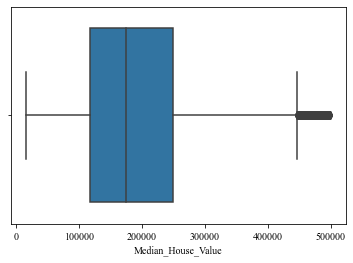

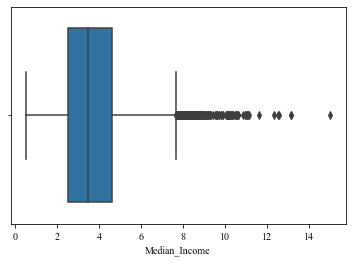

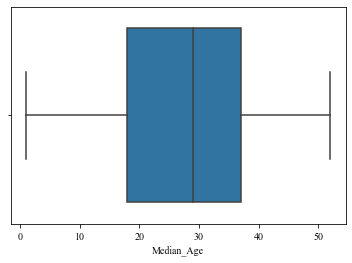

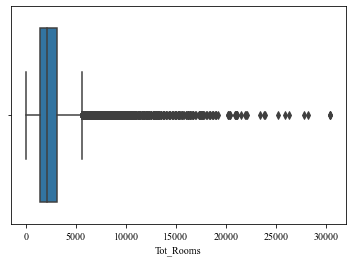

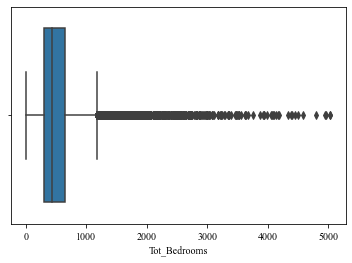

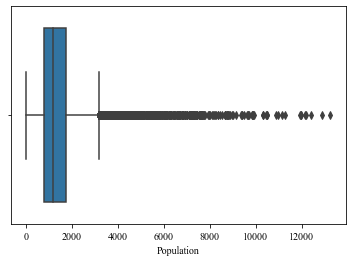

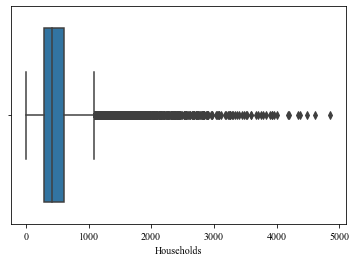

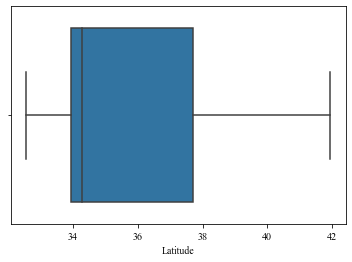

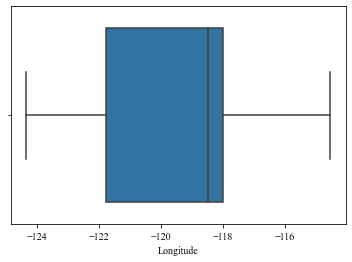

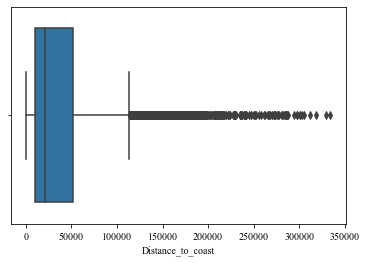

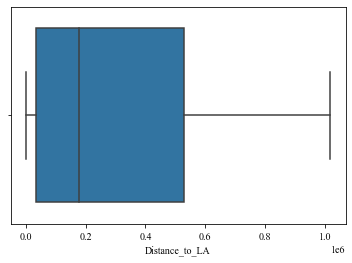

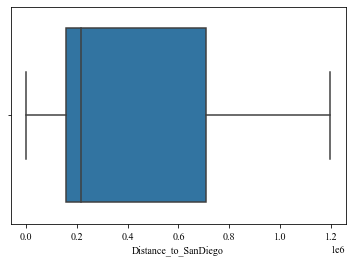

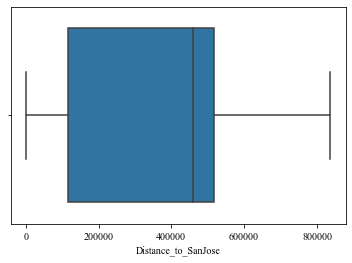

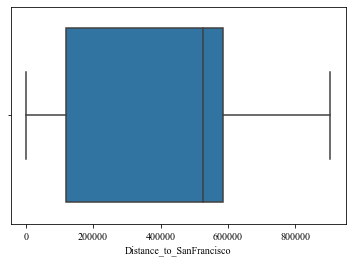

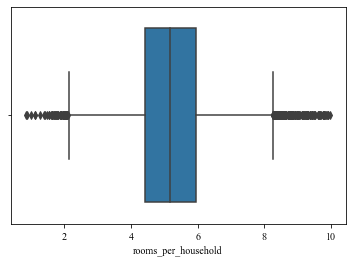

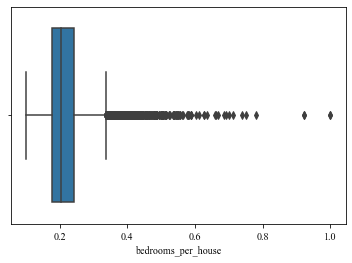

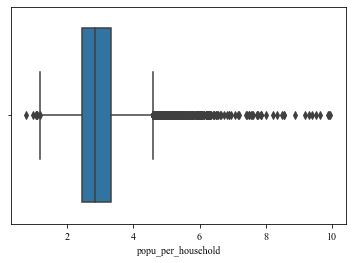

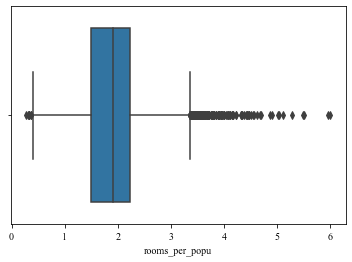

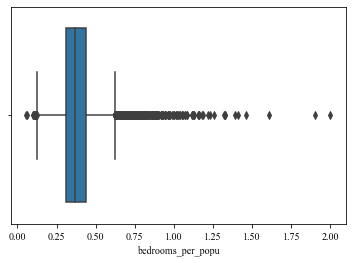

In [22]:
for col in df_sample.columns:
    sns.boxplot(df_sample[col])
    plt.show()

## Variable Declaration


1. Basic statistics of variables
2. Correlation coefficient
3. Random decision forests

### Basic statistics

In [23]:
df_sample.describe()

Median_House_Value           97178.360750
Median_Income                    1.563397
Median_Age                      12.477953
Tot_Rooms                     2095.788344
Tot_Bedrooms                   409.745581
Population                    1077.498768
Households                     374.744818
Latitude                         2.142960
Longitude                        2.004793
Distance_to_coast            48791.588051
Distance_to_LA              247896.896096
Distance_to_SanDiego        290226.500083
Distance_to_SanJose         217011.039441
Distance_to_SanFrancisco    249827.348045
rooms_per_household              1.168098
bedrooms_per_house               0.056827
popu_per_household               0.766194
rooms_per_popu                   0.568234
bedrooms_per_popu                0.115887
dtype: float64

### Correlation Coefficient

    Correlation coefficient shows the linear relationship between variables. Low correlation coefficient does not mean no relation between two variables; instead, it just shows that insignificant linear correlation.

In [24]:
df_sample.corr()["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.648337
rooms_per_popu              0.353296
rooms_per_household         0.256393
Tot_Rooms                   0.149864
bedrooms_per_popu           0.145787
Households                  0.094310
Tot_Bedrooms                0.078342
Median_Age                  0.065141
Population                  0.011708
Distance_to_SanFrancisco   -0.031146
Distance_to_SanJose        -0.042528
Longitude                  -0.045091
Distance_to_SanDiego       -0.096041
Distance_to_LA             -0.131125
Latitude                   -0.148108
bedrooms_per_house         -0.220301
popu_per_household         -0.246190
Distance_to_coast          -0.490831
Name: Median_House_Value, dtype: float64

### Variable significance using random decision forest 

In [53]:
import pydot
import scipy.stats as stats
import seaborn as sns
from sklearn import metrics
from openpyxl import load_workbook
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

%matplotlib inline

In [54]:
target_var = "Median_House_Value"
x_fields   = [c for c in df_sample.columns if c not in ["Id", target_var]]

In [55]:
# split sample
random_seed=44
random_forest_seed=np.random.randint(low=1,high=230)

df_sample_unnull  = df_sample[df_sample[target_var].notnull()].fillna(0)
df_train, df_test = train_test_split(df_sample_unnull, test_size=0.7, random_state=random_seed)

In [56]:
# sample filter
train_X, train_Y = df_train[x_fields], df_train[target_var]
test_X, test_Y   = df_test[x_fields],  df_test[target_var]
df_train.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_house,popu_per_household,rooms_per_popu,bedrooms_per_popu
3709,176300.0,2.4375,37,1434,394,1667,404,34.19,-118.38,22437.622031,19802.196137,199146.790529,471943.852050,539972.689027,3.549505,0.274756,4.126238,0.860228,0.236353
5376,340400.0,4.7386,52,1492,277,666,289,34.04,-118.39,10999.930244,13549.345215,186286.369558,484033.212679,552023.712780,5.162630,0.185657,2.304498,2.240240,0.415916
2508,74400.0,2.3295,42,1766,344,1084,323,36.97,-120.55,112268.777688,385763.136092,565076.376387,125771.699586,188752.701390,5.467492,0.194790,3.356037,1.629151,0.317343
15824,300000.0,2.7173,52,1974,525,935,465,37.75,-122.42,2795.631716,557149.897150,735583.105660,65445.637884,2844.545879,4.245161,0.265957,2.010753,2.111230,0.561497
10515,288500.0,5.9088,5,6698,1254,2834,1139,33.53,-117.70,8259.389729,76787.653198,103520.351280,568524.226776,636551.746005,5.880597,0.187220,2.488147,2.363444,0.442484


In [57]:
# train model
random_forest_model=RandomForestRegressor(n_estimators=200,random_state=random_forest_seed)
random_forest_model.fit(train_X,train_Y)
train_X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_house,popu_per_household,rooms_per_popu,bedrooms_per_popu
3709,2.4375,37,1434,394,1667,404,34.19,-118.38,22437.622031,19802.196137,199146.790529,471943.852050,539972.689027,3.549505,0.274756,4.126238,0.860228,0.236353
5376,4.7386,52,1492,277,666,289,34.04,-118.39,10999.930244,13549.345215,186286.369558,484033.212679,552023.712780,5.162630,0.185657,2.304498,2.240240,0.415916
2508,2.3295,42,1766,344,1084,323,36.97,-120.55,112268.777688,385763.136092,565076.376387,125771.699586,188752.701390,5.467492,0.194790,3.356037,1.629151,0.317343
15824,2.7173,52,1974,525,935,465,37.75,-122.42,2795.631716,557149.897150,735583.105660,65445.637884,2844.545879,4.245161,0.265957,2.010753,2.111230,0.561497
10515,5.9088,5,6698,1254,2834,1139,33.53,-117.70,8259.389729,76787.653198,103520.351280,568524.226776,636551.746005,5.880597,0.187220,2.488147,2.363444,0.442484


In [58]:
# Predict test set data
random_forest_predict=random_forest_model.predict(test_X)
random_forest_error=random_forest_predict-test_Y

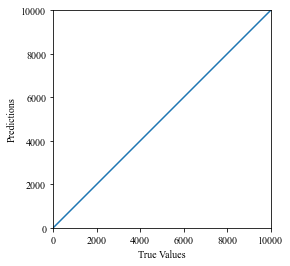

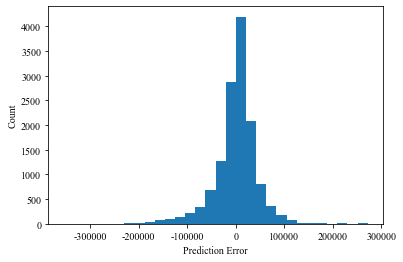

In [59]:
# Draw test plot
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(test_Y,random_forest_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,10000]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)

plt.figure(2)
plt.clf()
plt.hist(random_forest_error,bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.grid(False)

In [65]:
# Verify the accuracy
random_forest_pearson_r=stats.pearsonr(test_Y,random_forest_predict)
random_forest_R2=metrics.r2_score(test_Y,random_forest_predict)
random_forest_RMSE=metrics.mean_squared_error(test_Y,random_forest_predict)**0.5

print('Pearson correlation coefficient is {0}, and RMSE is {1}.'.format(random_forest_pearson_r[0]
                                                                        , random_forest_RMSE))

Pearson correlation coefficient is 0.8881068380394223, and RMSE is 44733.725144588956.


From the prediction error graph, we can see the error follows normal distrubution with the mean of zero, and based on the high Pearson correlation, we can conclude the Random Forest model is a successful model to predict the house prices.

In [66]:
def sort_dict(dic):
    lst = sorted(dic.items(),  key=lambda d: d[1], reverse=True)
    dict_sorted = {}
    for k, v in lst:
        dict_sorted[k] = v
        
    return dict_sorted

In [67]:
len(df_sample.columns)

19

Text(0.5, 1.0, 'Variables Importances')

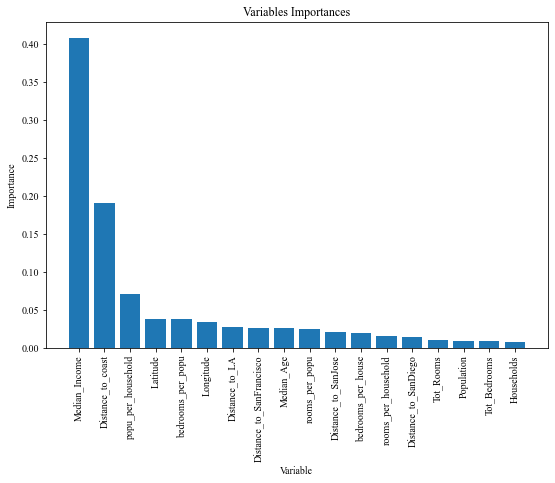

In [68]:
# Calculate the importance of variables
random_forest_importance=list(random_forest_model.feature_importances_)

dict_col_impt = {}
for feature, importance in zip(train_X.columns,random_forest_importance):
    dict_col_impt[feature] = importance

dict_col_impt_sorted = sort_dict(dict_col_impt)
    
# Draw importance
plt.figure(figsize=(9, 6))
plt.clf()


cnt_ipt_vars = 18
plt.bar(x=range(cnt_ipt_vars), height=list(dict_col_impt_sorted.values())[:cnt_ipt_vars],orientation='vertical') # len(dict_col_impt_sorted)
plt.xticks(range(cnt_ipt_vars), list(dict_col_impt_sorted.keys())[:cnt_ipt_vars]  ,rotation='vertical')   

plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variables Importances')

In [69]:
dict_col_impt_sorted

{'Median_Income': 0.4086327352306824,
 'Distance_to_coast': 0.19101202423029193,
 'popu_per_household': 0.0714690616091632,
 'Latitude': 0.0388993866885383,
 'bedrooms_per_popu': 0.03867056970156403,
 'Longitude': 0.033977281530313076,
 'Distance_to_LA': 0.027691313679167648,
 'Distance_to_SanFrancisco': 0.026534737053131235,
 'Median_Age': 0.026097476145084578,
 'rooms_per_popu': 0.0258372603901862,
 'Distance_to_SanJose': 0.020971174222207057,
 'bedrooms_per_house': 0.020215297197777243,
 'rooms_per_household': 0.01623922801035562,
 'Distance_to_SanDiego': 0.01479169533167295,
 'Tot_Rooms': 0.011558353149456831,
 'Population': 0.00952772204224726,
 'Tot_Bedrooms': 0.009324412084271448,
 'Households': 0.008550271703888963}

# Modeling & Evaluation

## Target Analysis



 mu = 192412.83 and sigma = 97175.86



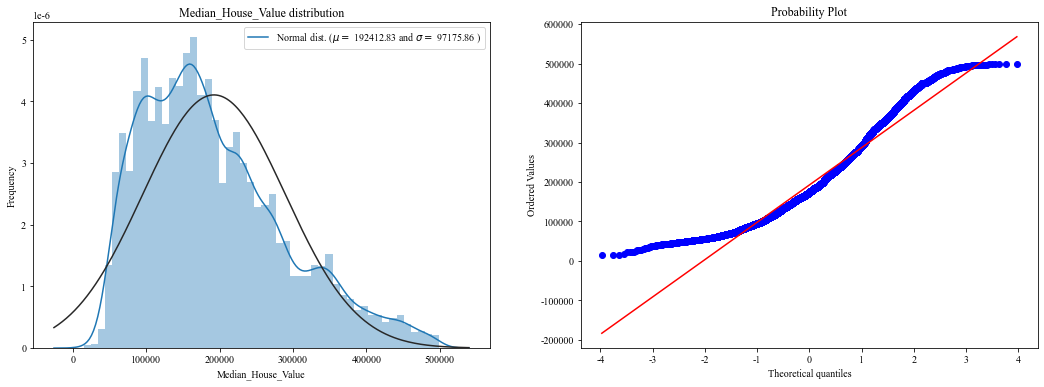

In [70]:
from scipy import stats
from scipy.stats import norm, skew

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)

#Now plot the distribution
sns.distplot(df_sample[target_var], fit=norm, ax=ax1);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_sample[target_var])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('%s distribution' %target_var)
 
#Get also the QQ-plot
#fig = plt.figure()
ax2 = fig.add_subplot(122)
res = stats.probplot(df_sample[target_var], plot=plt)
plt.show()

    We can see median_house_value is skewed distributed. However, linear regression requires variables to be normal distribution, so we log-transform it to make the data close to normal distribution.


 mu = 12.03 and sigma = 0.53



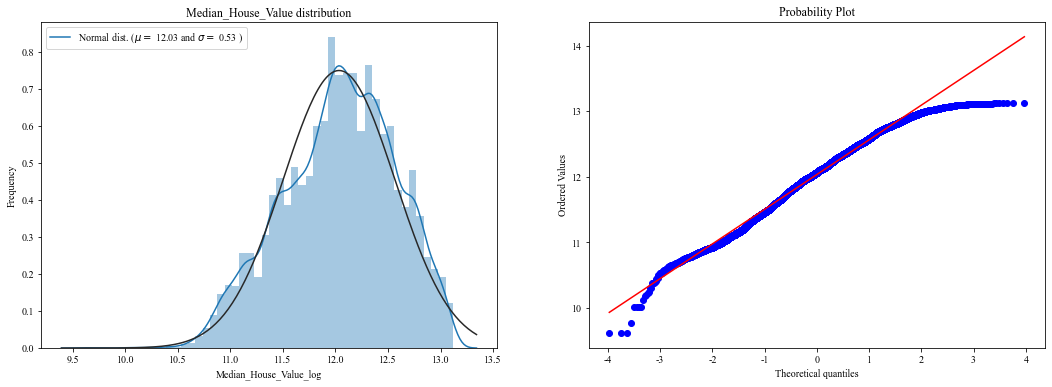

In [71]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)

df_sample["%s_log" %target_var] = df_sample[target_var].apply(np.log1p)

#Now plot the distribution
sns.distplot(df_sample["%s_log" %target_var], fit=norm, ax=ax1);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_sample["%s_log" %target_var])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('%s distribution' %target_var)
 
#Get also the QQ-plot
# fig = plt.figure()
ax2 = fig.add_subplot(122)
res = stats.probplot(df_sample["%s_log" %target_var], plot=plt)
plt.show()

In [72]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

## Standard

In the previous part, we find that each variable have different magnituden, and it will influence the model performance especiall for ols, so we normalize the data using RobustScaler().

In [73]:
df_sample.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco',
       'rooms_per_household', 'bedrooms_per_house', 'popu_per_household',
       'rooms_per_popu', 'bedrooms_per_popu', 'Median_House_Value_log'],
      dtype='object')

In [74]:
scaler = RobustScaler()

target_log = "%s_log" %target_var
x_vars     = [c for c in df_sample.columns if c not in [target_var, target_log, "Latitude", "Longitude"]]

df_sample2 = pd.DataFrame(scaler.fit_transform(df_sample[x_vars]))
df_sample2.columns     = x_vars
df_sample2.index       = df_sample.index
df_sample2[target_log] = df_sample[target_log]

dftrain, dftest = train_test_split(df_sample2, test_size=0.3, random_state=21)

x_train, x_test, y_train, y_test = dftrain[[c for c in dftrain.columns if c!=target_log]], dftest[[c for c in dftest.columns if c!=target_log]], dftrain[target_log], dftest[target_log]

In [75]:
display(x_train.head(1))
display(x_test.head(1))
display(y_train.head(1))
display(y_test.head(1))

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_house,popu_per_household,rooms_per_popu,bedrooms_per_popu
9143,0.548833,0.157895,-0.127691,-0.269341,-0.400739,-0.354938,1.221519,-0.246295,-0.016287,0.042245,0.038464,0.761795,-0.383188,-0.170748,0.600625,0.447957


,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_house,popu_per_household,rooms_per_popu,bedrooms_per_popu
5648,-0.597392,1.210526,-0.401615,0.103152,-0.176874,-0.046296,-0.432933,-0.285156,-0.116212,0.142249,0.124909,-1.018695,1.947485,-0.338955,-0.664552,0.764848


9143    11.979178
Name: Median_House_Value_log, dtype: float64

5648    12.633629
Name: Median_House_Value_log, dtype: float64

In [76]:
#Validation function
n_folds = 5

def rmse_cv(model, x_train, y_train):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Model

## Multiple Linear Regression

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import random
from sklearn.metrics import mean_squared_error

In [78]:
x_train.head(1)

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_house,popu_per_household,rooms_per_popu,bedrooms_per_popu
9143,0.548833,0.157895,-0.127691,-0.269341,-0.400739,-0.354938,1.221519,-0.246295,-0.016287,0.042245,0.038464,0.761795,-0.383188,-0.170748,0.600625,0.447957


In [79]:
xy_train = x_train[x_vars]
xy_train[target_log] = y_train
xy_train["SETID"] = xy_train[target_log].apply(lambda x:1 if random.random()>=0.3 else 0)
xy_train.to_csv(r"sample_4_mdl.csv", index=None, encoding="utf-8")
xy_train.shape

(13578, 18)

In [80]:
xy_train.head(1)

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_house,popu_per_household,rooms_per_popu,bedrooms_per_popu,Median_House_Value_log,SETID
9143,0.548833,0.157895,-0.127691,-0.269341,-0.400739,-0.354938,1.221519,-0.246295,-0.016287,0.042245,0.038464,0.761795,-0.383188,-0.170748,0.600625,0.447957,11.979178,1


In [81]:
xy_train.columns

Index(['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
       'Population', 'Households', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco', 'rooms_per_household', 'bedrooms_per_house',
       'popu_per_household', 'rooms_per_popu', 'bedrooms_per_popu',
       'Median_House_Value_log', 'SETID'],
      dtype='object')

In [82]:
lm_1=ols("Median_House_Value_log~Median_Income + Median_Age + Tot_Rooms + Households + Distance_to_coast + Distance_to_LA + Distance_to_SanFrancisco + popu_per_household + bedrooms_per_popu",data=xy_train[xy_train["SETID"]==1]).fit()
print(lm_1.summary())

                              OLS Regression Results                              
Dep. Variable:     Median_House_Value_log   R-squared:                       0.682
Model:                                OLS   Adj. R-squared:                  0.681
Method:                     Least Squares   F-statistic:                     2265.
Date:                    Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                            22:43:51   Log-Likelihood:                -1933.3
No. Observations:                    9533   AIC:                             3887.
Df Residuals:                        9523   BIC:                             3958.
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [83]:
y_real = np.expm1(xy_train[xy_train["SETID"]==0]["Median_House_Value_log"])
y_pred = np.expm1(lm_1.predict(xy_train[xy_train["SETID"]==0]))

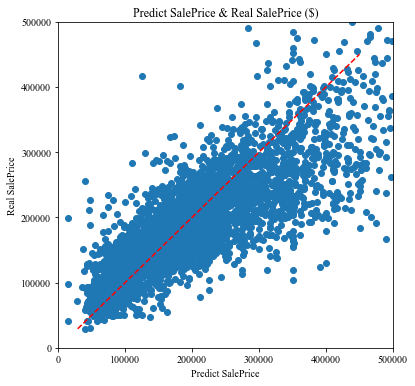

In [84]:
plt.figure(figsize=(6, 6))
plt.scatter(y_real, y_pred)
plt.plot([ min(y_pred), 450000],[ min(y_pred), 450000], color = 'red', linestyle = '--')
plt.xlabel("Predict SalePrice")
plt.ylabel("Real SalePrice")
plt.title("Predict SalePrice & Real SalePrice ($)")
plt.xlim([0, 500000])
plt.ylim([0, 500000])
plt.show()

In [87]:
res_mse = mean_squared_error(y_real, y_pred)
res_mse

4332900898.274365

In [88]:
pd.DataFrame({"real":y_real, "pred_stepwise":y_pred}).head(1)

,real,pred_stepwise
16571,133500.0,230769.119802


### Summary

    In this part, we do OLS regression to test if there is a linear relation between house value and variables. The R square of the OLS is 0.682, which is not very high for a good model. However, the predicted house value is around the model in the test set, as shown in the above graph. Therefore, the model is significant in predicting house value.

## Random decision forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

x_train, y_train = xy_train[xy_train["SETID"]==1][[c for c in xy_train.columns if c not in ("SETID", "Median_House_Value_log")]], xy_train[xy_train["SETID"]==1]["Median_House_Value_log"]
x_test, y_test   = xy_train[xy_train["SETID"]==0][[c for c in xy_train.columns if c not in ("SETID", "Median_House_Value_log")]], xy_train[xy_train["SETID"]==0]["Median_House_Value_log"]

forest_reg = RandomForestRegressor(random_state=21).fit(x_train, y_train)
forest_reg

RandomForestRegressor(random_state=21)

In [98]:
pred_train = forest_reg.predict(x_train)
rmse_train = mean_squared_error(np.expm1(pred_train), np.expm1(y_train))
sco_train = cross_val_score(forest_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=5)

rmse_train, sco_train

(331741685.92799425,
 array([-0.05201489, -0.0473558 , -0.04957496, -0.05278986, -0.05217355]))

In [97]:
pred_test = forest_reg.predict(x_test)
rmse_test = mean_squared_error(np.expm1(pred_test), np.expm1(y_test))
sco_test = cross_val_score(forest_reg, x_test, y_test, scoring="neg_mean_squared_error", cv=5)

rmse_test, sco_test

(2121043267.2227879,
 array([-0.05859846, -0.0522324 , -0.06832549, -0.07102359, -0.05486937]))

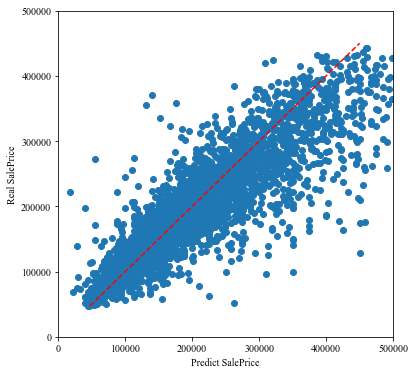

In [54]:
y_real = np.expm1(y_test)
y_pred_rf = np.expm1(forest_reg.predict(x_test))

plt.figure(figsize=(6, 6))
plt.scatter(y_real, y_pred_rf)
plt.plot([ min(y_pred_rf), 450000],[ min(y_pred_rf), 450000], color = 'red', linestyle = '--')
plt.xlabel("Predict SalePrice")
plt.ylabel("Real SalePrice")
# plt.title("Predict SalePrice & Real SalePrice ($)")
plt.xlim([0, 500000])
plt.ylim([0, 500000])
plt.show()

In [55]:
mean_squared_error(y_real, y_pred_rf)

2093364320.322063

In [56]:
pd.DataFrame({"real":y_real, "pred_stepwise":y_pred, "pred_rfg":y_pred_rf}).to_excel("predict_result.xlsx")
pd.DataFrame({"real":y_real, "pred_stepwise":y_pred, "pred_rfg":y_pred_rf}).head(1)

,real,pred_stepwise,pred_rfg
9143,159400.0,191154.660603,149538.749971


### Summary

    In this part, we can see the actual values are closer to the predicted line and much lower mes than OLS estimation. Therefore, random forest has more accurate estimation than OLS. 

# Findings

    As we can see in the OLS regression, the house's location is significant for house value. The model uses the distance to the coast, distance to Los Angeles, and distance to San Fransico as three variables to influence house value. As the data suggest, location has negative relation with house value, which means that the closer to these three locations, the higher value of the house. Meanwhile, median income and median age positively relationship with house value. This is reasonable because wealthier people tend to live in more expensive houses. Also, young people usually cannot afford to live in expensive houses, so, as age increases, people are more likely to live in more luxurious houses.
    The project includes two regression methods, one is OLS, and the other is random forest regression. OLS is a straightforward regression method, and it is easy to understand. Readers can easily understand the relation between house value and other variables. However, the R square of the OLS is not high enough to persuade scholars that OLS is a good regression model for this dataset. Random decision forest regression has smaller RMSE than OLS, and we can see that test data fits random forest regression better than OLS. 

# Conclusion

From the project analysis, we know that: Location has a negative relationship with house prices, especially for houses located at Los Angeles and San Fransico; median income and median age have a positive relationship with house prices; compared with OLS method, random decision forest regression is more economic accurate when predicting house prices.

Using the same method, we can predict the house prices of other cities such as Boston and London. Although we can acquire the correlation between California housing prices and other variables through random forest regression, we can hardly compute the exact regression coefficients of these factors in the project.

Purchasing a house is a big decision in a person’s life and needs a considerable amount of thought and research. From this house price prediction project, one can buy a house at the best rate and suppose the house to be the best investment for the future.This project can also provide the best counties/areas in the USA to invest in for a national real estate developer, individual buyers, banks looking for a place to develop a new apartment building or to purchase. As a future scope, better fitted models can also be obtained by performing some advanced statistical techniques on this data like Random Forest.

In conclusion, we can say that as of now predictive analytics is barely scratching the surface of the real estate sector. However, the impact of this technology is apparent across the industry. There’s no doubt that predictive analytics will drastically change the landscape of this market in years to come for residential as well as commercial real estate and on both the buying and selling side.